In [ ]:
# !pip install matplotlib networkx

In [3]:
import io

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Create an illustrative figure

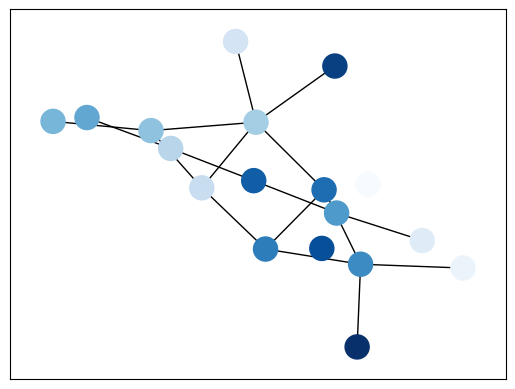

In [47]:
g = nx.fast_gnp_random_graph(18, 0.15)
nx.draw_networkx(g, pos=nx.kamada_kawai_layout(g), with_labels=False, cmap=plt.cm.Blues, node_color=range(10, 10+len(g.nodes)))
plt.show()

### Process report tables

In [59]:
def preprocess_table(table_str) -> str:
    table_rows = table_str.split('\n')
    table_rows.pop(2)
    table_rows = [row.strip().strip('|') for row in table_rows]
    return '\n'.join(table_rows)

table_str = """
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |    0.144003  |       0.131535  |      0.125169  |
| hit@1  |    0.0888493 |       0.0758988 |      0.0712283 |
| hit@3  |    0.191457  |       0.17854   |      0.169292  |
| hit@10 |    0.24757   |       0.237852  |      0.226466  |
"""

print(preprocess_table(table_str))



        |   removed 0 |   removed 0.25 |   removed 0.5 
 mrr    |    0.144003  |       0.131535  |      0.125169  
 hit@1  |    0.0888493 |       0.0758988 |      0.0712283 
 hit@3  |    0.191457  |       0.17854   |      0.169292  
 hit@10 |    0.24757   |       0.237852  |      0.226466  



In [110]:
def avg_tables(str_tables) -> str:
    tables = [pd.read_csv(io.StringIO(preprocess_table(table_str)), sep='|', index_col=0).astype(float) for table_str in str_tables]
    arrays = [table.to_numpy() for table in tables]
    table = np.mean(arrays, axis=0).round(3)
    table = pd.DataFrame(table, columns=tables[0].columns, index=tables[0].index)
    return table.to_markdown()

In [111]:

transE_fb15k = [
'''
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.144779      | 0.133817     | 0.122680    |
| hit@1  | 0.089196      | 0.080227     | 0.068185    |
| hit@3  | 0.192543      | 0.178478     | 0.168462    |
| hit@10 | 0.248934      | 0.235516     | 0.223718    |
''',

'''
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |    0.144003  |       0.131535  |      0.125169  |
| hit@1  |    0.0888493 |       0.0758988 |      0.0712283 |
| hit@3  |    0.191457  |       0.17854   |      0.169292  |
| hit@10 |    0.24757   |       0.237852  |      0.226466  |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |       0.146391  |      0.13467   |     0.123645  |
| hit@1  |       0.0918733 |      0.0801898 |     0.0698635 |
| hit@3  |       0.192894  |      0.18015   |     0.16789   |
| hit@10 |       0.250882  |      0.237016  |     0.22405   |
'''
]

print(avg_tables(transE_fb15k))

|            |    removed 0.001  |    removed 0.25  |    removed 0.5  |
|:-----------|------------------:|-----------------:|----------------:|
| mrr        |             0.145 |            0.133 |           0.124 |
| hit@1      |             0.09  |            0.079 |           0.07  |
| hit@3      |             0.192 |            0.179 |           0.169 |
| hit@10     |             0.249 |            0.237 |           0.225 |


In [112]:
transE_fb15k_237 = [

''' 
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |    0.128145  |       0.116593  |      0.111709  |
| hit@1  |    0.0755256 |       0.0657217 |      0.0616326 |
| hit@3  |    0.171372  |       0.157445  |      0.151056  |
| hit@10 |    0.227397  |       0.212365  |      0.20722   |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |       0.125564  |      0.117304  |     0.107022  |
| hit@1  |       0.0732396 |      0.0667472 |     0.0580775 |
| hit@3  |       0.168908  |      0.159131  |     0.143638  |
| hit@10 |       0.223654  |      0.213823  |     0.198571  |
''',

''' 
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.127797      | 0.117506     | 0.108299    |
| hit@1  | 0.074163      | 0.066656     | 0.060983    |
| hit@3  | 0.173014      | 0.156944     | 0.144391    |
| hit@10 | 0.228102      | 0.215168     | 0.194879    |
'''
]

print(avg_tables(transE_fb15k_237))

|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.127 |              0.117 |             0.109 |
| hit@1      |           0.074 |              0.066 |             0.06  |
| hit@3      |           0.171 |              0.158 |             0.146 |
| hit@10     |           0.226 |              0.214 |             0.2   |


In [113]:
transE_wn18 = [
'''
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |    0.177978  |       0.187143  |       0.240802 |
| hit@1  |    0.0556542 |       0.0647819 |       0.145998 |
| hit@3  |    0.31419   |       0.321497  |       0.346558 |
| hit@10 |    0.399857  |       0.403442  |       0.414231 |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |       0.183545  |      0.189091  |      0.246779 |
| hit@1  |       0.0589241 |      0.0664664 |      0.152827 |
| hit@3  |       0.322954  |      0.326231  |      0.353046 |
| hit@10 |       0.40864   |      0.411864  |      0.421948 |
''',

''' 
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.177925      | 0.191048     | 0.240928    |
| hit@1  | 0.055096      | 0.067468     | 0.145657    |
| hit@3  | 0.315401      | 0.327643     | 0.346149    |
| hit@10 | 0.403274      | 0.411226     | 0.417304    |
'''
]

print(avg_tables(transE_wn18))

|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.18  |              0.189 |             0.243 |
| hit@1      |           0.057 |              0.066 |             0.148 |
| hit@3      |           0.318 |              0.325 |             0.349 |
| hit@10     |           0.404 |              0.409 |             0.418 |


In [114]:
transE_wn18rr = [
'''
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |    0.141768  |       0.143204  |      0.137816  |
| hit@1  |    0.0173259 |       0.0301545 |      0.0239528 |
| hit@3  |    0.287855  |       0.277035  |      0.27529   |
| hit@10 |    0.371978  |       0.354427  |      0.339906  |
''',

''' 
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.144203      | 0.146824     | 0.137230    |
| hit@1  | 0.020520      | 0.030377     | 0.027184    |
| hit@3  | 0.291681      | 0.283868     | 0.268605    |
| hit@10 | 0.372756      | 0.356506     | 0.332665    |
''',

'''
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |       0.143165  |      0.146861  |     0.138148  |
| hit@1  |       0.0196833 |      0.0301545 |     0.0239528 |
| hit@3  |       0.286439  |      0.282086  |     0.274733  |
| hit@10 |       0.370748  |      0.361854  |     0.341912  |
'''

]

print(avg_tables(transE_wn18rr))


|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.143 |              0.146 |             0.138 |
| hit@1      |           0.019 |              0.03  |             0.025 |
| hit@3      |           0.289 |              0.281 |             0.273 |
| hit@10     |           0.372 |              0.358 |             0.338 |


In [115]:
complex_fb15k = [
'''
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |     0.41634  |       0.15581   |      0.124145  |
| hit@1  |     0.281487 |       0.0904318 |      0.0698451 |
| hit@3  |     0.57451  |       0.217577  |      0.174087  |
| hit@10 |     0.677431 |       0.288054  |      0.233475  |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |        0.418731 |      0.15195   |      0.257402 |
| hit@1  |        0.283152 |      0.0890179 |      0.154445 |
| hit@3  |        0.577455 |      0.210778  |      0.367023 |
| hit@10 |        0.683294 |      0.279841  |      0.470896 |
''',

''' 
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.416486      | 0.159202     | 0.255720    |
| hit@1  | 0.281121      | 0.095436     | 0.152010    |
| hit@3  | 0.574280      | 0.219065     | 0.366820    |
| hit@10 | 0.680599      | 0.287550     | 0.468628    |
'''
]

print(avg_tables(complex_fb15k))


|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.417 |              0.156 |             0.212 |
| hit@1      |           0.282 |              0.092 |             0.125 |
| hit@3      |           0.575 |              0.216 |             0.303 |
| hit@10     |           0.68  |              0.285 |             0.391 |


In [116]:
complex_fb15k_237 = [
'''
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |     0.240459 |       0.187645  |      0.0624788 |
| hit@1  |     0.127756 |       0.0922018 |      0.0383879 |
| hit@3  |     0.367476 |       0.287065  |      0.0822452 |
| hit@10 |     0.470979 |       0.387904  |      0.108019  |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |        0.24301  |      0.0656841 |     0.0560931 |
| hit@1  |        0.129354 |      0.0382161 |     0.0315854 |
| hit@3  |        0.370817 |      0.089809  |     0.0768442 |
| hit@10 |        0.473619 |      0.118135  |     0.103268  |
''',

''' 
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.239733      | 0.186149     | 0.141416    |
| hit@1  | 0.126651      | 0.090538     | 0.067581    |
| hit@3  | 0.367738      | 0.284194     | 0.210399    |
| hit@10 | 0.470711      | 0.391664     | 0.302147    |
'''
]

print(avg_tables(complex_fb15k_237))

|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.241 |              0.146 |             0.087 |
| hit@1      |           0.128 |              0.074 |             0.046 |
| hit@3      |           0.369 |              0.22  |             0.123 |
| hit@10     |           0.472 |              0.299 |             0.171 |


In [117]:
complex_wn18 = [

'''
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |     0.825274 |        0.489498 |       0.326491 |
| hit@1  |     0.78568  |        0.427069 |       0.270418 |
| hit@3  |     0.87541  |        0.56287  |       0.393608 |
| hit@10 |     0.891594 |        0.599882 |       0.430142 |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |        0.24301  |      0.0656841 |     0.0560931 |
| hit@1  |        0.129354 |      0.0382161 |     0.0315854 |
| hit@3  |        0.370817 |      0.089809  |     0.0768442 |
| hit@10 |        0.473619 |      0.118135  |     0.103268  |
''',

''' 
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.823200      | 0.560793     | 0.324231    |
| hit@1  | 0.783478      | 0.497132     | 0.268233    |
| hit@3  | 0.871556      | 0.638123     | 0.389579    |
| hit@10 | 0.888953      | 0.666940     | 0.424133    |
'''
]

print(avg_tables(complex_wn18))

|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.63  |              0.372 |             0.236 |
| hit@1      |           0.566 |              0.321 |             0.19  |
| hit@3      |           0.706 |              0.43  |             0.287 |
| hit@10     |           0.751 |              0.462 |             0.319 |


In [118]:
complex_wn18rr = [
'''
|        | removed 0.001 | removed 0.25 | removed 0.5 |
|--------|---------------|--------------|-------------|
| mrr    | 0.391270      | 0.262602     | 0.025772    |
| hit@1  | 0.368741      | 0.218434     | 0.016600    |
| hit@3  | 0.414910      | 0.313577     | 0.034314    |
| hit@10 | 0.431471      | 0.334373     | 0.040998    |
''',

''' 
|        |   removed 0.001 |   removed 0.25 |   removed 0.5 |
|:-------|----------------:|---------------:|--------------:|
| mrr    |        0.397673 |       0.265649 |     0.0265374 |
| hit@1  |        0.376547 |       0.217692 |     0.0174911 |
| hit@3  |        0.419148 |       0.321301 |     0.0338681 |
| hit@10 |        0.435932 |       0.344177 |     0.0423351 |
''',

''' 
|        |   removed 0 |   removed 0.25 |   removed 0.5 |
|:-------|-------------:|----------------:|---------------:|
| mrr    |     0.396389 |       0.0977864 |      0.10573   |
| hit@1  |     0.371978 |       0.0726381 |      0.0698529 |
| hit@3  |     0.42156  |       0.126188  |      0.14639   |
| hit@10 |     0.438273 |       0.146019  |      0.177028  |
'''
]

print(avg_tables(complex_wn18rr))


|            |    removed 0.001  |    removed 0.25  |    removed 0.5  |
|:-----------|------------------:|-----------------:|----------------:|
| mrr        |             0.395 |            0.209 |           0.053 |
| hit@1      |             0.372 |            0.17  |           0.035 |
| hit@3      |             0.419 |            0.254 |           0.072 |
| hit@10     |             0.435 |            0.275 |           0.087 |


### Plot the numbers

In [ ]:
def table_barchat(table_str):
    table_str = preprocess_table(table_str)
    table = pd.read_csv(io.StringIO(table_str), sep='|', index_col=0)
    table = table.astype(float)
    table.plot.bar()
    plt.show()


In [109]:
def plot_exp(tables, titles):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    for i, table_str in enumerate(tables):
        table_str = preprocess_table(table_str)
        table = pd.read_csv(io.StringIO(table_str), sep='|', index_col=0)
        table = table.astype(float)
        table.plot.bar(ax=axs[i//2, i%2], title=titles[i])
    fig.autofmt_xdate(rotation=45)
    plt.show()
    

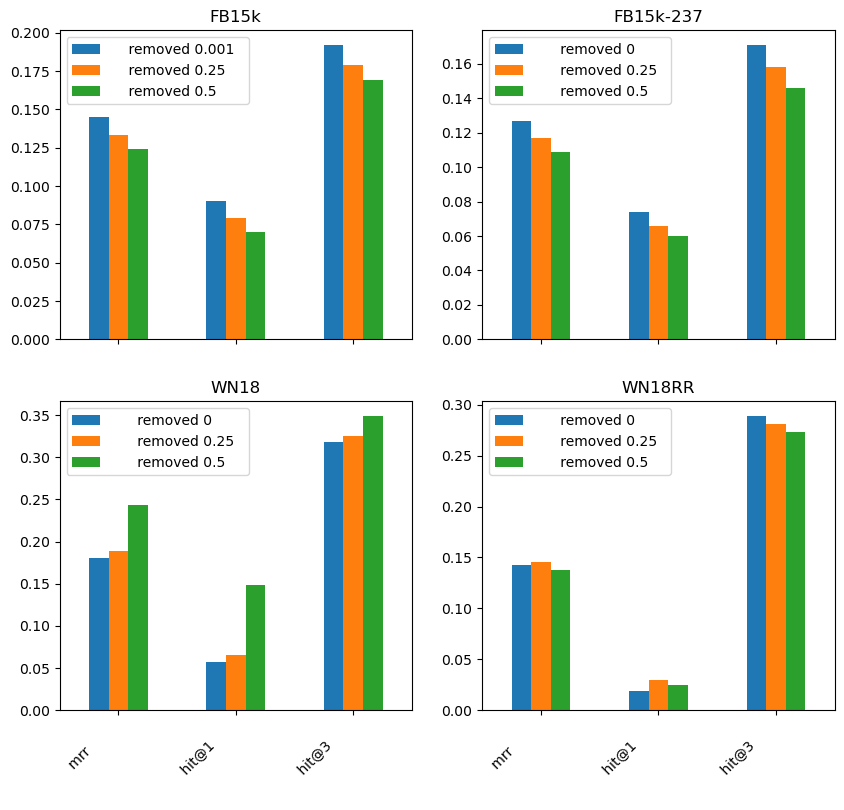

In [122]:
TransE_incomplete_tables = [
'''
|            |    removed 0.001  |    removed 0.25  |    removed 0.5  |
|:-----------|------------------:|-----------------:|----------------:|
| mrr        |             0.145 |            0.133 |           0.124 |
| hit@1      |             0.09  |            0.079 |           0.07  |
| hit@3      |             0.192 |            0.179 |           0.169 |
''',

'''
|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.127 |              0.117 |             0.109 |
| hit@1      |           0.074 |              0.066 |             0.06  |
| hit@3      |           0.171 |              0.158 |             0.146 |
''',

'''
|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.18  |              0.189 |             0.243 |
| hit@1      |           0.057 |              0.066 |             0.148 |
| hit@3      |           0.318 |              0.325 |             0.349 |
''',

''' 
|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.143 |              0.146 |             0.138 |
| hit@1      |           0.019 |              0.03  |             0.025 |
| hit@3      |           0.289 |              0.281 |             0.273 |
'''
]

plot_exp(TransE_incomplete_tables, ['FB15k', 'FB15k-237', 'WN18', 'WN18RR'])

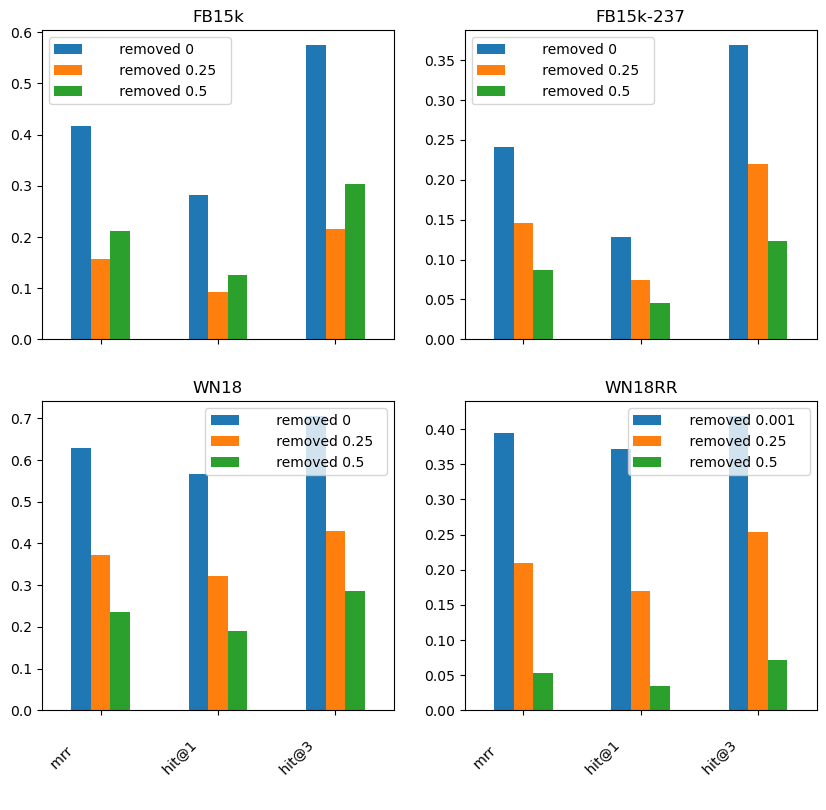

In [123]:
ComplEx_incomplete_tables = [
'''
|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.417 |              0.156 |             0.212 |
| hit@1      |           0.282 |              0.092 |             0.125 |
| hit@3      |           0.575 |              0.216 |             0.303 |
''',

'''
|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.241 |              0.146 |             0.087 |
| hit@1      |           0.128 |              0.074 |             0.046 |
| hit@3      |           0.369 |              0.22  |             0.123 |
''',

'''
|            |      removed 0  |      removed 0.25  |      removed 0.5  |
|:-----------|----------------:|-------------------:|------------------:|
| mrr        |           0.63  |              0.372 |             0.236 |
| hit@1      |           0.566 |              0.321 |             0.19  |
| hit@3      |           0.706 |              0.43  |             0.287 |
''',

'''
|            |    removed 0.001  |    removed 0.25  |    removed 0.5  |
|:-----------|------------------:|-----------------:|----------------:|
| mrr        |             0.395 |            0.209 |           0.053 |
| hit@1      |             0.372 |            0.17  |           0.035 |
| hit@3      |             0.419 |            0.254 |           0.072 |
'''
]

plot_exp(ComplEx_incomplete_tables, ['FB15k', 'FB15k-237', 'WN18', 'WN18RR'])

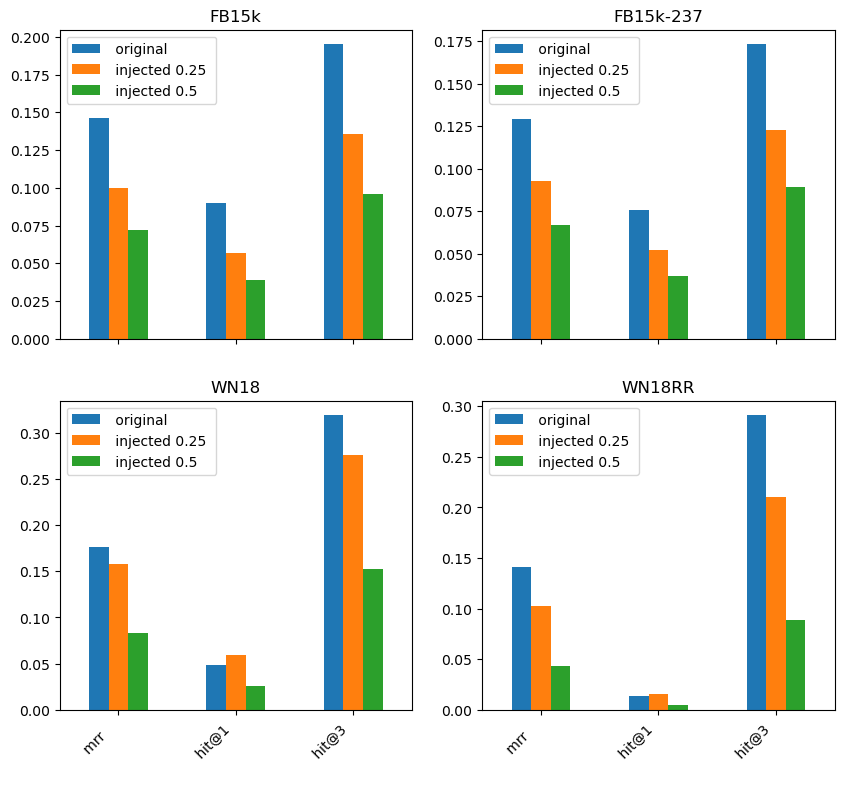

In [124]:
TransE_inconsistent_tables = [
'''
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.146     | 0.100             | 0.072            |
| hit@1 | 0.090     | 0.057             | 0.039            |
| hit@3 | 0.195     | 0.136             | 0.096            |
''',

'''
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.129     | 0.093             | 0.067            |
| hit@1 | 0.076     | 0.052             | 0.037            |
| hit@3 | 0.173     | 0.123             | 0.089            |
''',

''' 
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.176     | 0.158             | 0.083            |
| hit@1 | 0.048     | 0.059             | 0.026            |
| hit@3 | 0.319     | 0.276             | 0.152            |
''',

''' 
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.141     | 0.103             | 0.043            |
| hit@1 | 0.014     | 0.016             | 0.005            |
| hit@3 | 0.291     | 0.210             | 0.089            |
'''
]

plot_exp(TransE_inconsistent_tables, ['FB15k', 'FB15k-237', 'WN18', 'WN18RR'])

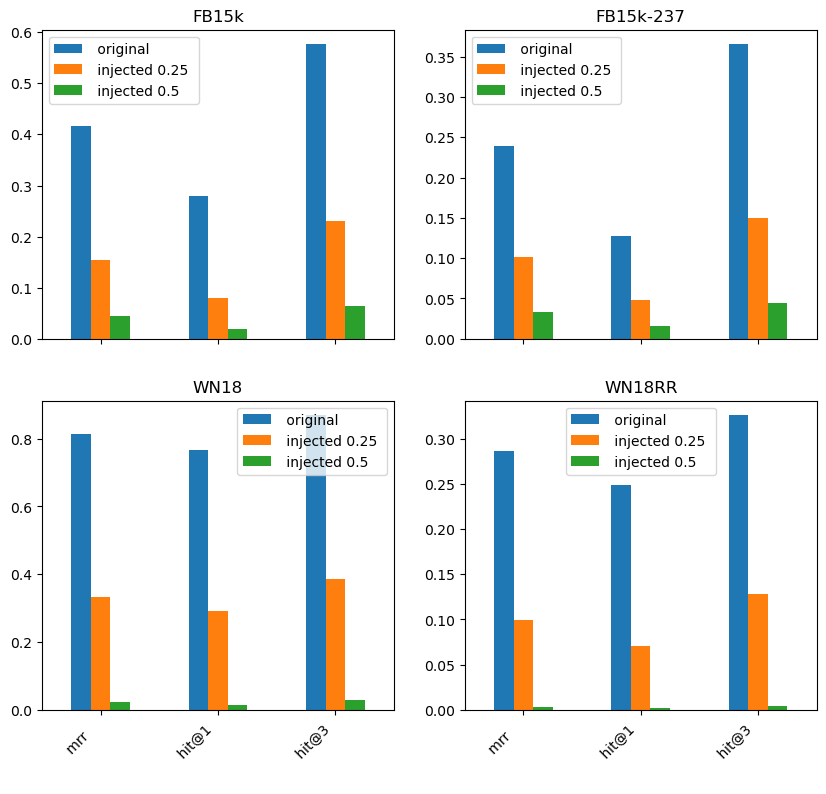

In [130]:
ComplEx_inconsistent_tables = [

'''
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.416     | 0.155             | 0.045            |
| hit@1 | 0.279     | 0.080             | 0.020            |
| hit@3 | 0.576     | 0.231             | 0.064            |
''',

''' 
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.239     | 0.101             | 0.033            |
| hit@1 | 0.128     | 0.048             | 0.016            |
| hit@3 | 0.365     | 0.150             | 0.044            |
''',

''' 
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.813     | 0.334             | 0.022            |
| hit@1 | 0.767     | 0.290             | 0.014            |
| hit@3 | 0.869     | 0.385             | 0.028            |
''',

'''
|       | original | injected 0.25 | injected 0.5 |
|-------|-----------|-------------------|------------------|
| mrr   | 0.286     | 0.099             | 0.003            |
| hit@1 | 0.249     | 0.071             | 0.002            |
| hit@3 | 0.326     | 0.128             | 0.004            |
'''
]

plot_exp(ComplEx_inconsistent_tables, ['FB15k', 'FB15k-237', 'WN18', 'WN18RR'])

In [136]:
def plot_avg(tabls1_str, tables2_str, titles):
    tables1 = [pd.read_csv(io.StringIO(preprocess_table(table_str)), sep='|', index_col=0).astype(float) for table_str in tabls1_str]
    arrays1 = [table.to_numpy() for table in tables1]
    
    
    tables2 = [pd.read_csv(io.StringIO(preprocess_table(table_str)), sep='|', index_col=0).astype(float) for table_str in tables2_str]
    arrays2 = [table.to_numpy() for table in tables2]

    tables = []
    for arr1, arr2 in zip(arrays1, arrays2):
        tables.append((arr1 + arr2) / 2)
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    for i, table in enumerate(tables):
        table = pd.DataFrame(table, columns=tables1[0].columns, index=tables1[0].index)
        table.plot.bar(ax=axs[i//2, i%2], title=titles[i])
    fig.autofmt_xdate(rotation=45)
    plt.show()


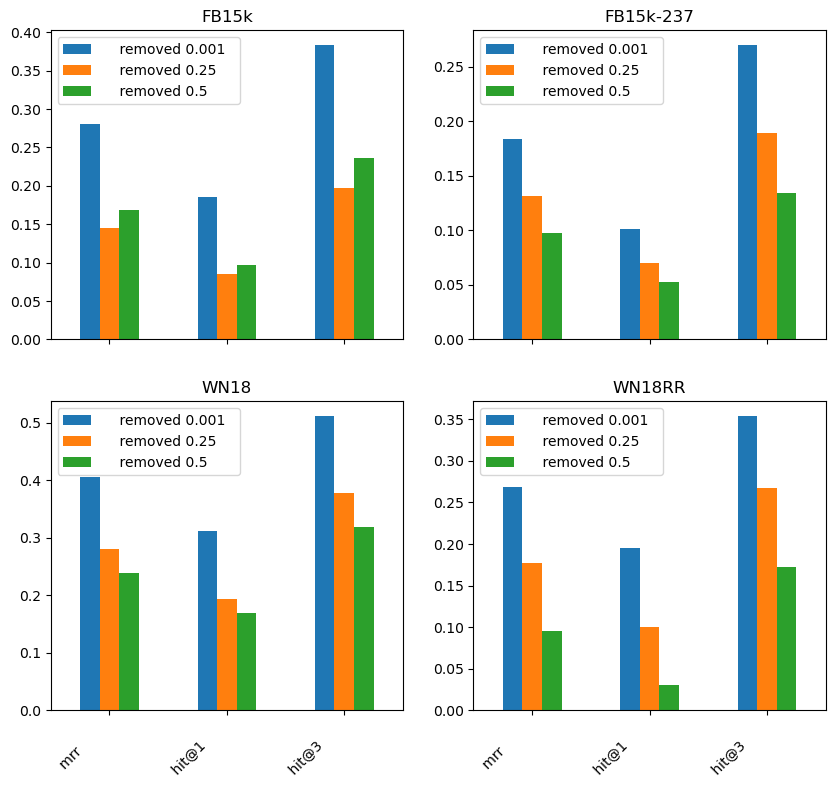

In [138]:
plot_avg(TransE_incomplete_tables, ComplEx_incomplete_tables, ['FB15k', 'FB15k-237', 'WN18', 'WN18RR'])

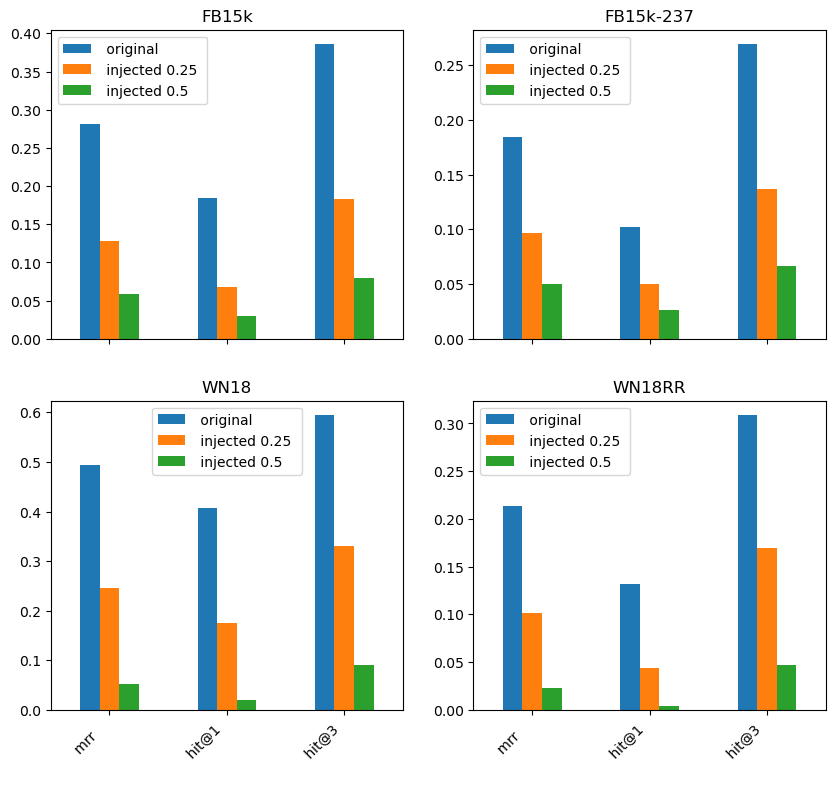

In [139]:
plot_avg(TransE_inconsistent_tables, ComplEx_inconsistent_tables, ['FB15k', 'FB15k-237', 'WN18', 'WN18RR'])

In [145]:
mrr_FB_incons = np.array([
    [0.146, 0.129], 
    [0.416, 0.239]
    
])

mrr_WN_incons = np.array([
    [0.176, 0.141],
    [0.813, 0.286]
])

mrr_FB_incompl = np.array([
    [0.145, 0.127],
    [0.417, 0.241]
])

mrr_WN_incompl = np.array([
    [0.18, 0.143],
    [0.813, 0.395]
])

table_mrr_FB_incons = pd.DataFrame(mrr_FB_incons, columns=['FB15k', 'FB15K-237'], index=['TransE', 'ComplEx'])
table_mrr_WN_incons = pd.DataFrame(mrr_WN_incons, columns=['WN18', 'WN18RR'], index=['TransE', 'ComplEx'])

table_mrr_FB_incompl = pd.DataFrame(mrr_FB_incompl, columns=['FB15k', 'FB15K-237'], index=['TransE', 'ComplEx'])
table_mrr_WN_incompl = pd.DataFrame(mrr_WN_incompl, columns=['WN18', 'WN18RR'], index=['TransE', 'ComplEx'])

# print(table_mrr_FB_incons.to_latex())
# print(table_mrr_WN_incons.to_latex())

print(table_mrr_FB_incompl.to_latex())
print(table_mrr_WN_incompl.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  FB15k &  FB15K-237 \\
\midrule
TransE  &  0.145 &      0.127 \\
ComplEx &  0.417 &      0.241 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &   WN18 &  WN18RR \\
\midrule
TransE  &  0.180 &   0.143 \\
ComplEx &  0.813 &   0.395 \\
\bottomrule
\end{tabular}

